In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Input, concatenate, GlobalAveragePooling2D, \
    AveragePooling2D, Flatten


import matplotlib.pyplot as plt
import os
import re
import PIL 
from PIL import Image
import numpy as np
import pickle
import cv2
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical

import math
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib
print(cv2.__version__)

2023-11-03 23:42:52.817233: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


4.8.1


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-11-03 23:42:54.408315: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-03 23:42:54.412055: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-03 23:42:54.413795: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-11-03 23:42:56.046516: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-11-03 23:42:56.047658: I tensorflow/core/common_runtime/gpu/gpu_d

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2280235602653192079,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10565736192
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2272390644110341603
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:07:00.0, compute capability: 7.5",
 name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 10565736192
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9064830290763800084
 physical_device_desc: "device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:08:00.0, compute capability: 7.5",
 name: "/device:GPU:2"
 device_type: "GPU"
 memory_limit: 196542464
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5470701529647064479
 physical_device_desc: "device: 2, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:0d:00.0, compute capability: 7.5",
 name: "/device:GPU:3"
 device_type: "GPU"
 memory_limit: 10414930048
 locali

 510.07GiB/s
2023-11-03 23:42:56.055654: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 6 with properties: 
pciBusID: 0000:0c:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2023-11-03 23:42:56.056785: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 7 with properties: 
pciBusID: 0000:0e:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2023-11-03 23:42:56.056815: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-11-03 23:42:56.058355: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-11-03 23:42:56.058386: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcu

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

8 Physical GPUs, 8 Logical GPUs


2023-11-03 23:42:59.208647: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-03 23:42:59.209782: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-11-03 23:42:59.210893: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:08:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-11-03 23:42:59.211634: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:0d:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidt

In [4]:
path = "/home/youngjun/catanddogandpanda/animals/animals/train/"

file_groups=[]
y_train=[]

all_files= os.listdir(path)

for i,file_name in enumerate(all_files):
    if re.match(r'cats', file_name):
        img = cv2.imread(path+f"{file_name}", cv2.COLOR_BGR2RGB)
        
        img= cv2.resize(img, (224, 224))
        x = np.array(img)
   
        file_groups.append(x)
        y_train.append([1,0,0])
        
    elif re.match(r'dogs', file_name):
        img = cv2.imread(path+f"{file_name}", cv2.COLOR_BGR2RGB)
        
        img= cv2.resize(img, (224, 224))
        x = np.array(img)
   
        file_groups.append(x)
        y_train.append([0,1,0])
        
    elif re.match(r'panda',file_name):
        img = cv2.imread(path+f"{file_name}", cv2.COLOR_BGR2RGB)
        
        img= cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x = np.array(img)
       
       
            
        file_groups.append(x)
        y_train.append([0,0,1])
    
    print(i)
file_groups=np.array(file_groups)
y_train=np.array(y_train)
print(file_groups.shape)
print(y_train.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089


In [5]:

from tensorflow.keras.layers import Layer
import tensorflow as tf

class LRN(Layer):
    def __init__(self, depth_radius=5, alpha=0.0001, beta=0.75, bias=1.0, **kwargs):
        self.depth_radius = depth_radius
        self.alpha = alpha
        self.beta = beta
        self.bias = bias
        super(LRN, self).__init__(**kwargs)

    def build(self, input_shape):
        super(LRN, self).build(input_shape)

    def call(self, x):
        # Using TensorFlow's nn.lrn function for ease
        return tf.nn.lrn(x, depth_radius=self.depth_radius, bias=self.bias, alpha=self.alpha, beta=self.beta)

    def compute_output_shape(self, input_shape):
        return input_shape


In [9]:
Input = keras.Input(shape=(224,224,3))

def inception_module(x,filter_1x1,filter_3x3_pre,filter_3x3,filter_5x5_pre,filter_5x5,filter_pool_pr,name=None,kernel_init='glorot_uniform',bias_init='zeros'):
    
    conv_1x1 = Conv2D(filter_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3_reduce = Conv2D(filter_3x3_pre, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filter_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3_reduce)
    conv_5x5_reduce = Conv2D(filter_5x5_pre, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filter_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5_reduce)

    max_pool = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filter_pool_pr, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(max_pool)
    
    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)

    return output
    

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epoch_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch) / epoch_drop))
    return lrate


kernel_init = tf.keras.initializers.glorot_uniform()
bias_init = tf.keras.initializers.Constant(value=0.2)

input_layer = tf.keras.Input(shape=(224, 224, 3))
#layer 1
x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)

x = MaxPool2D((3, 3), strides=(2, 2), name='max_pool_1_3x3/2', padding='same')(x)
lrn1=LRN()(x)

#layer 2
x=Conv2D(64,(1,1), padding='valid', strides=(1, 1), activation='relu', name='conv_2_1x1/V', kernel_initializer=kernel_init, bias_initializer=bias_init)(lrn1)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2_3x3/1', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
lrn2=LRN()(x)
x = MaxPool2D((3, 3), strides=(2, 2), name='max_pool_2_3x3/2', padding='same')(lrn2)

#layer 3
x = inception_module(x, 64, 96, 128, 16, 32, 32, name='inception_3a', kernel_init=kernel_init, bias_init=bias_init)
x = inception_module(x, 128, 128, 192, 32, 96, 64, name='inception_3b', kernel_init=kernel_init, bias_init=bias_init)
x = MaxPool2D((3, 3), strides=(2, 2), name='max_pool_3_3x3/2')(x)

# Layer 4
x = inception_module(x, 192, 96, 208, 16, 48, 64, name='inception_4a')
#AveragePooling2D vaild paing default
#Layer 4 auxiliary learning 1
x1 = AveragePooling2D((5, 5), strides=3, name='avg_pool_aux_1')(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu', name='conv_aux_1')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu', name='dense_aux_1')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(3, activation='softmax', name='aux_output_1')(x1)

x = inception_module(x, 160, 112, 224, 24, 64, 64, name='inception_4b', kernel_init=kernel_init, bias_init=bias_init)
x = inception_module(x, 128, 128, 256, 24, 64, 64, name='inception_4c', kernel_init=kernel_init, bias_init=bias_init)
x = inception_module(x, 112, 144, 288, 32, 64, 64, name='inception_4d', kernel_init=kernel_init, bias_init=bias_init)

x2 = AveragePooling2D((5, 5), strides=3, name='avg_pool_aux_2')(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu', name='conv_aux_2')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu', name='dense_aux_2')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(3, activation='softmax', name='aux_output_2')(x2)

x = inception_module(x, 256, 160, 320, 32, 128, 128, name='inception_4e', kernel_init=kernel_init, bias_init=bias_init)
x = MaxPool2D((3, 3), strides=(2, 2), name='max_pool_4_3x3/2')(x)

 # Layer 5
x = inception_module(x, 256, 160, 320, 32, 128, 128, name='inception_5a', kernel_init=kernel_init, bias_init=bias_init)
x = inception_module(x, 384, 192, 384, 48, 128, 128, name='inception_5b', kernel_init=kernel_init, bias_init=bias_init)
x = GlobalAveragePooling2D(name='global_avg_pool_5_3x3/1')(x)
x = Dropout(0.4)(x)
x = Dense(3, activation='softmax', name='output')(x)

model = Model(input_layer, [x, x1, x2], name='inception_v1')
 
model.summary()

epoch = 80
initial_lrate = 0.01                     


Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 112, 112, 64) 9472        input_4[0][0]                    
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 56, 56, 64)   0           conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
lrn_2 (LRN)                     (None, 56, 56, 64)   0           max_pool_1_3x3/2[0][0]           
_______________________________________________________________________________________

In [10]:
sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)
lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'],loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

history = model.fit(file_groups, [y_train, y_train, y_train],epochs=epoch, batch_size=32, callbacks=[lr_sc], validation_split=0.2)

Epoch 1/80

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
75/75 [==============================] - 11s 120ms/step - loss: 2.2051 - output_loss: 1.3299 - aux_output_1_loss: 1.7343 - aux_output_2_loss: 1.1832 - output_accuracy: 0.3255 - aux_output_1_accuracy: 0.3659 - aux_output_2_accuracy: 0.3512 - val_loss: 1.8325 - val_output_loss: 1.1628 - val_aux_output_1_loss: 1.1211 - val_aux_output_2_loss: 1.1112 - val_output_accuracy: 0.3633 - val_aux_output_1_accuracy: 0.3167 - val_aux_output_2_accuracy: 0.3167
Epoch 2/80

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.
75/75 [==============================] - 8s 111ms/step - loss: 1.8050 - output_loss: 1.1323 - aux_output_1_loss: 1.1267 - aux_output_2_loss: 1.1157 - output_accuracy: 0.3351 - aux_output_1_accuracy: 0.3427 - aux_output_2_accuracy: 0.3201 - val_loss: 1.7450 - val_output_loss: 1.0894 - val_aux_output_1_loss: 1.0837 - val_aux_output_2_loss: 1.1015 - val_output_accuracy: 0.3633 - val_aux_outpu

75/75 [==============================] - 8s 112ms/step - loss: 1.0105 - output_loss: 0.6349 - aux_output_1_loss: 0.6223 - aux_output_2_loss: 0.6297 - output_accuracy: 0.6252 - aux_output_1_accuracy: 0.6414 - aux_output_2_accuracy: 0.6204 - val_loss: 1.0081 - val_output_loss: 0.6343 - val_aux_output_1_loss: 0.6307 - val_aux_output_2_loss: 0.6152 - val_output_accuracy: 0.6233 - val_aux_output_1_accuracy: 0.6700 - val_aux_output_2_accuracy: 0.6383
Epoch 32/80

Epoch 00032: LearningRateScheduler reducing learning rate to 0.008493465599999998.
75/75 [==============================] - 8s 112ms/step - loss: 1.0196 - output_loss: 0.6415 - aux_output_1_loss: 0.6362 - aux_output_2_loss: 0.6244 - output_accuracy: 0.6406 - aux_output_1_accuracy: 0.6397 - aux_output_2_accuracy: 0.6240 - val_loss: 0.9369 - val_output_loss: 0.5828 - val_aux_output_1_loss: 0.5951 - val_aux_output_2_loss: 0.5850 - val_output_accuracy: 0.6717 - val_aux_output_1_accuracy: 0.6667 - val_aux_output_2_accuracy: 0.6400
Epoch 

75/75 [==============================] - 8s 112ms/step - loss: 0.6974 - output_loss: 0.4392 - aux_output_1_loss: 0.4304 - aux_output_2_loss: 0.4304 - output_accuracy: 0.7780 - aux_output_1_accuracy: 0.7935 - aux_output_2_accuracy: 0.7799 - val_loss: 0.8461 - val_output_loss: 0.5263 - val_aux_output_1_loss: 0.5384 - val_aux_output_2_loss: 0.5273 - val_output_accuracy: 0.7567 - val_aux_output_1_accuracy: 0.7633 - val_aux_output_2_accuracy: 0.7550
Epoch 62/80

Epoch 00062: LearningRateScheduler reducing learning rate to 0.007514474781081598.
75/75 [==============================] - 8s 113ms/step - loss: 0.6992 - output_loss: 0.4401 - aux_output_1_loss: 0.4266 - aux_output_2_loss: 0.4371 - output_accuracy: 0.7772 - aux_output_1_accuracy: 0.7900 - aux_output_2_accuracy: 0.7886 - val_loss: 0.8259 - val_output_loss: 0.5097 - val_aux_output_1_loss: 0.5176 - val_aux_output_2_loss: 0.5362 - val_output_accuracy: 0.7733 - val_aux_output_1_accuracy: 0.7650 - val_aux_output_2_accuracy: 0.7567
Epoch 

dict_keys(['loss', 'output_loss', 'aux_output_1_loss', 'aux_output_2_loss', 'output_accuracy', 'aux_output_1_accuracy', 'aux_output_2_accuracy', 'val_loss', 'val_output_loss', 'val_aux_output_1_loss', 'val_aux_output_2_loss', 'val_output_accuracy', 'val_aux_output_1_accuracy', 'val_aux_output_2_accuracy', 'lr'])


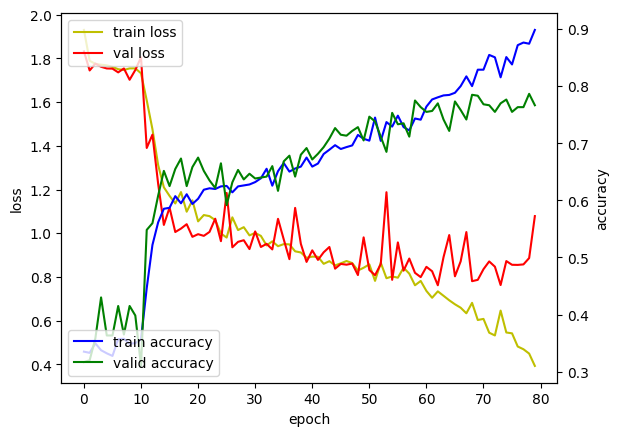

In [11]:
print(history.history.keys())
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'r', label = 'val loss')
    
acc_ax.plot(history.history['output_accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_aux_output_2_accuracy'], 'g', label = 'valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
